In [13]:
import pysal as ps 
import geopandas as gpd 
import libpysal as lps
import matplotlib.pyplot as plt

In [27]:
gdf = gpd.read_file(r"C:\Users\Runker\Desktop\test\test.shp")

In [47]:
# 创建空间权重矩阵
w = lps.weights.Queen.from_dataframe(gdf,use_index = False)
w.transform = 'r'

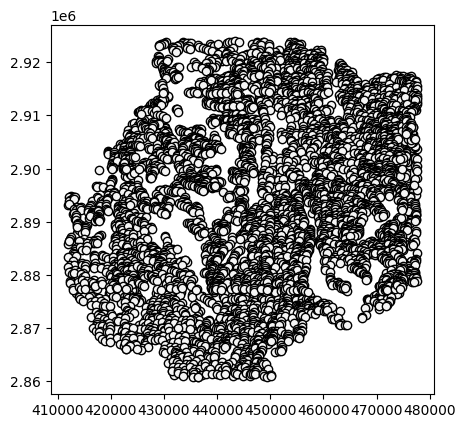

In [17]:
# 绘制地图
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='whitesmoke', edgecolor='black')

# 绘制邻接关系
for i, geom in enumerate(gdf.geometry):
    neighbors = w.neighbors[i]
    for neighbor in neighbors:
        # 获取邻接多边形的边界
        line = geom.boundary.intersection(gdf.geometry[neighbor].boundary)
        if line.is_empty:
            continue
        x, y = line.xy
        ax.plot(x, y, color='red')

plt.show()

In [28]:
from pysal.model import spreg
import numpy as np

In [29]:
# 仅对数值型列使用均值填充
numeric_cols = gdf.select_dtypes(include=[np.number])
gdf[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())


In [48]:
# features_list = ['BIO', 'PRE', 'SRA', 'TMP', 'VAP', 'WIN', 'NDVI', 'TDQS', 'LIGHT',
#        'Analytical', 'Aspect', 'ChannelNet', 'ChannelN_1', 'ClosedDepr',
#        'Convergenc', 'LSFactor', 'PlanCurvat', 'ProfileCur', 'RelativeSl',
#        'Slope', 'Topographi', 'TotalCatch', 'ValleyDept', 'DEM', 'LON', 'LAT']
features_list = ['BIO', 'SRA', 'TMP', 'VAP', 'WIN', 'TDQS', 'LIGHT',
       'Analytical', 'Aspect',  'RelativeSl',
        'LON', 'LAT']
labels = 'pH'

In [49]:
X = gdf[features_list]
y = gdf[labels]

In [50]:
model = spreg.OLS(y.values, X.values, w=w, spat_diag=True, moran=True)
print(model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        6498
Mean dependent var  :      5.6785                Number of Variables   :          13
S.D. dependent var  :      0.8180                Degrees of Freedom    :        6485
R-squared           :      0.1472
Adjusted R-squared  :      0.1456
Sum squared residual:     3707.77                F-statistic           :     93.2730
Sigma-square        :       0.572                Prob(F-statistic)     :  1.283e-213
S.E. of regression  :       0.756                Log likelihood        :   -7397.370
Sigma-square ML     :       0.571                Akaike info criterion :   14820.740
S.E of regression ML:      0.7554                Schwarz criterion     :   14908.870

------------------------------------------------------------

In [51]:
model = spreg.ML_Lag(y.values, X.values, w=w, name_y=labels,name_x=features_list,name_w='w',name_ds='gdf')

In [52]:
print(model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :         gdf
Weights matrix      :           w
Dependent Variable  :          pH                Number of Observations:        6498
Mean dependent var  :      5.6785                Number of Variables   :          14
S.D. dependent var  :      0.8180                Degrees of Freedom    :        6484
Pseudo R-squared    :      0.3073
Spatial Pseudo R-squared:  0.1390
Log likelihood      :  -6906.7960
Sigma-square ML     :      0.4677                Akaike info criterion :   13841.592
S.E of regression   :      0.6839                Schwarz criterion     :   13936.502

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [62]:
# 获取模型系数
betas = model.betas.flatten()

In [56]:
betas

array([-5.49830713e+01,  3.90602447e-02,  1.25126304e-03,  9.23097946e-02,
       -2.31566913e+00, -1.38803184e+00, -2.02404824e-02,  3.15360493e-02,
       -9.17194369e-02, -2.03590003e-03, -5.72315607e-01, -4.08518720e-06,
        1.41056843e-05,  4.94692740e-01])

{0: [1, 4949, 4951], 1: [0, 4949, 550, 551], 2: [4960, 4953, 4951], 3: [4, 5, 84], 4: [3, 5, 102, 6, 76, 79, 81, 84, 91], 5: [3, 4, 6], 6: [4, 101, 5, 102, 100], 7: [64, 33, 34, 9, 42], 8: [9, 90], 9: [64, 33, 7, 8, 90], 10: [1728, 65, 1794, 1795, 1729, 1731, 41, 11], 11: [65, 1795, 10, 26, 12], 12: [1795, 11, 1846, 56, 1849, 26, 29, 57], 13: [48, 14, 63, 62, 47], 14: [48, 66, 67, 13, 62, 15], 15: [16, 17, 67, 14, 62], 16: [17, 18, 62, 15], 17: [16, 18, 67, 15], 18: [16, 17, 67, 6285, 6286], 19: [50, 20, 21, 1941, 6360, 25, 6362], 20: [19, 21, 22, 24, 25], 21: [19, 20, 1941, 1894, 22, 1939, 23], 22: [24, 20, 21, 23], 23: [21, 1894, 22, 24, 59, 60, 61], 24: [20, 22, 23, 25, 61, 31], 25: [32, 34, 42, 19, 20, 24, 6362, 31], 26: [65, 11, 12, 29], 27: [89, 65, 38, 39, 41, 28], 28: [65, 33, 89, 27, 29, 30], 29: [65, 26, 56, 58, 12, 28, 30], 30: [33, 29, 58, 60, 28, 31], 31: [32, 33, 24, 25, 60, 61, 30], 32: [33, 34, 25, 31], 33: [32, 34, 7, 9, 89, 90, 28, 30, 31], 34: [32, 33, 7, 25, 42], 35

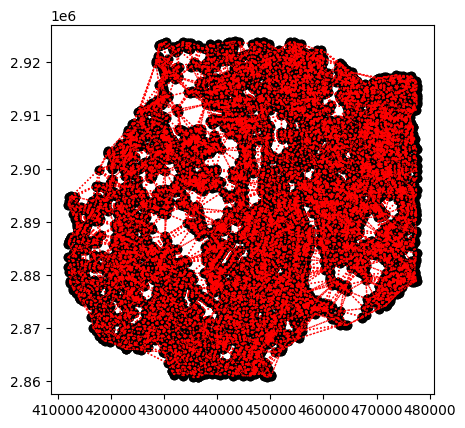

In [89]:
# 查看基本属性
print(w.neighbors)  # 查看邻居
print(w.weights)    # 查看权重

# 可视化
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='whitesmoke', edgecolor='black')
w.plot(gdf, ax=ax, edge_kws=dict(color='r', linestyle=':', linewidth=1))
plt.show()